In [2]:
import requests, re, time
import torch, torchvision
from torch import nn, optim
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt

from google.colab import files

In [13]:
!git clone https://github.com/vicky208/cpen391-dataset.git

fatal: destination path 'cpen391-dataset' already exists and is not an empty directory.


In [10]:
model1 = models.resnet50(pretrained=True)
model1.fc = nn.Linear(model1.fc.in_features, 10)

In [14]:
model1.load_state_dict(torch.load('cpen391-dataset/model1',map_location='cpu'))

<All keys matched successfully>

In [16]:
optimizer = optim.SGD(model1.parameters(), lr=0.001, momentum=0.9, weight_decay = 0.035)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.4)

In [44]:
fruits = ["apple","banana","kiwi","lemon","mangostan","orange","pear","pineapple","strawberry","watermelon"]

In [54]:
def prediction(img):
  xform = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor(), torchvision.transforms.RandomHorizontalFlip(p=0.5)])
  img = xform(img)
  model1.eval()
  img = img.unsqueeze(0)
  output = model1(img)
  _, pred = torch.max(output.detach(), 1)
  return fruits[pred.item()]

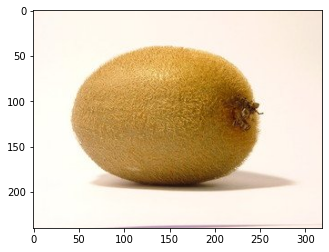

In [55]:
import cv2
from PIL import Image
import numpy as np
img = cv2.imread('kiwi1.jpg')
img4= Image.fromarray(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.imshow(img4)

In [52]:
prediction(img4)

'kiwi'